# Desynchronization time calculator

## Load model

In [1]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import seaborn as sns

## Load data and model

In [2]:
siameseCNN = tf.keras.models.load_model(r'models\2022-06-08 (cv_flow_full)\17-31-04\full')

c:\Users\Nicolas Boizard\AppData\Local\Python Environment\ISIA_Lab\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: models.siamese is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


In [10]:
imageL = []
imageR = []

for i in range(24):
    imageL.append(
        cv.resize(
            cv.imread(fr"datasets\test\left\{i}.jpg"),
            (224,224)
        )
    )

    imageR.append(
        cv.resize(
            cv.imread(fr"datasets\test\right\{i}.jpg"),
            (224,224)
        )
    )

imageL = np.apply_along_axis(lambda x: x/255, 0, imageL)
imageR = np.apply_along_axis(lambda x: x/255, 0, imageR)



In [14]:
delay = 2

if delay != 0:
    imageL = imageL[:-delay]
    imageR = imageR[delay:]

In [15]:
result = []

for imgL in imageL:
    for imgR in imageR:
        result.append(siameseCNN.predict([(imgL.reshape(1,224,224,3), imgR.reshape(1,224,224,3))])[0][0])


1/1 [==============================] - 0s 37ms/step


<AxesSubplot:>

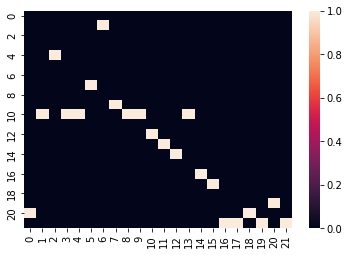

In [16]:
result = np.reshape(result, (len(imageL), len(imageL)))
heatMap = np.zeros(result.shape)
heatMap[np.argmax(result, axis=0), np.arange(result.shape[1])] = 1

sns.heatmap(heatMap)

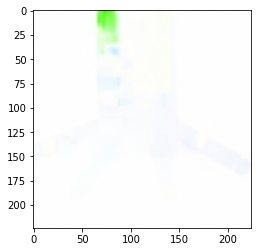

In [21]:
plt.imshow(imageR[12])